## Part 2: Exploratory Data Analysis (EDA)

Link to [Part 1 - Data Wrangling](capstone1-wrangling.ipynb)
<br>
Link to [Part 3 - Inferential Statistics](capstone1-is.ipynb)
<br>
Link to [Part 4 - Machine Learning](capstone1-ml.ipynb)
<br>

In [90]:
%%capture
%run capstone1-wrangling.ipynb #Load Part 1

In [91]:
#Analyze top 10 ZIP Codes with highest number of orders
amzn_zip_count = amzn_data[['zipcode', 'amazon-order-id']].groupby('zipcode').count().rename(columns={'amazon-order-id':'count'})
amzn_zip_count = amzn_zip_count.sort_values('count', ascending=False)
amzn_zip_count.head(10)

,count
zipcode,
92110,14
07020,4
22902,3
22207,3
97230,3
76248,3
33613,3
54843,3
33183,3


In [92]:
#Multi-index demo_data to get 'zipcode' in the index (prep for joining)
demo_data = demo_data.set_index(['zipcode', 'agi_stub'])
demo_data.head()

N1  mars1  MARS2  MARS4  NUMDEP  ELDERLY  A00100
zipcode agi_stub                                                    
35004   1         1510    990    220    280     660      340   19351
        2         1410    660    360    340     900      270   51976
        3          950    330    470    140     660      200   58988
        4          650    120    470     50     560      130   56302
        5          630     50    560     20     610      130   81057

In [93]:
#Match types in preparation for joining
a = demo_data.index.levels[0].astype(str)
b = demo_data.index.levels[1].astype('int64')
demo_data.index = demo_data.index.set_levels([a,b])
demo_data.index.levels[0]

Index([u'01001', u'01002', u'01003', u'01005', u'01007', u'01008', u'01009',
       u'01010', u'01011', u'01012',
       ...
       u'99833', u'99835', u'99840', u'99901', u'99919', u'99921', u'99922',
       u'99925', u'99926', u'99929'],
      dtype='object', name=u'zipcode', length=29872)

In [94]:
amzn_zip_count.index = amzn_zip_count.index.astype('str')
amzn_zip_count.index

Index([u'92110', u'07020', u'22902', u'22207', u'97230', u'76248', u'33613',
       u'54843', u'33183', u'27519',
       ...
       u'33129', u'32953', u'32839', u'32835', u'32803', u'32766', u'32720',
       u'32714', u'32708', u'99824'],
      dtype='object', name=u'zipcode', length=571)

In [95]:
joint_data = amzn_zip_count.join(demo_data)
print(joint_data.head(10))
print(joint_data.shape)

                  count   N1  mars1  MARS2  MARS4  NUMDEP  ELDERLY  A00100
zipcode agi_stub                                                          
35175   1             2  730    450    170    100     320      170    9283
        2             2  510    210    240     70     300      150   18853
        3             2  300     70    200     50     220       90   18803
        4             2  210     30    180      0     160       70   18216
        5             2  270     20    240      0     220       90   35919
        6             2   40      0     40      0      30       20   20384
99824   1             1  270    220      0     30      70       30    3009
        2             1  260    180     30     40      80       40    9660
        3             1  210    130     50     40      80       50   13128
        4             1  150     70     70      0      50       50   12806
(3396, 8)


In [96]:
#Discard AGI Bins & Sum

joint_grouped = joint_data.reset_index()
joint_grouped = joint_grouped.groupby('zipcode').sum()
joint_grouped['count'] = joint_grouped['count'] / 6
joint_grouped['count'] = joint_grouped['count'].astype(int)
joint_grouped = joint_grouped.drop('agi_stub', axis=1)
joint_grouped = joint_grouped.sort_values('count', ascending=False)
print(joint_grouped.head())

         count     N1  mars1  MARS2  MARS4  NUMDEP  ELDERLY   A00100
zipcode                                                             
92110       14  13130   8030   3730   1100    5000     3010   983303
07020        4   6130   2940   2380    610    2880     1240   850117
54843        3   5840   2750   2400    640    2900     2030   306851
22207        3  15000   6650   7270    770   10280     4190  3501311
94708        3   5950   2900   2730    230    2360     2550  1136310


In [97]:
#Perform arithmetic operations
joint_grouped['avg_AGI'] = joint_grouped['A00100'] / joint_grouped['N1']
joint_grouped['%_single'] = joint_grouped['mars1'] / joint_grouped['N1'] * 100
joint_grouped['%_married'] = joint_grouped['MARS2'] / joint_grouped['N1'] * 100
joint_grouped['%_HOH'] = joint_grouped['MARS4'] / joint_grouped['N1'] * 100
joint_grouped['%_elderly'] = joint_grouped['ELDERLY'] / joint_grouped['N1'] * 100
joint_grouped['avg_DEP'] = joint_grouped['NUMDEP'] / (joint_grouped['MARS2'] + joint_grouped['MARS4'])

print(joint_grouped.head())

         count     N1  mars1  MARS2  MARS4  NUMDEP  ELDERLY   A00100  \
zipcode                                                                
92110       14  13130   8030   3730   1100    5000     3010   983303   
07020        4   6130   2940   2380    610    2880     1240   850117   
54843        3   5840   2750   2400    640    2900     2030   306851   
22207        3  15000   6650   7270    770   10280     4190  3501311   
94708        3   5950   2900   2730    230    2360     2550  1136310   

            avg_AGI   %_single  %_married      %_HOH  %_elderly   avg_DEP  
zipcode                                                                    
92110     74.889794  61.157654  28.408225   8.377761  22.924600  1.035197  
07020    138.681403  47.960848  38.825449   9.951060  20.228385  0.963211  
54843     52.542979  47.089041  41.095890  10.958904  34.760274  0.953947  
22207    233.420733  44.333333  48.466667   5.133333  27.933333  1.278607  
94708    190.976471  48.739496  45.8823

In [98]:
#Get summary columns & sum
demo_data_RAW2 = pd.read_csv('16zpallagi.csv', usecols=['zipcode', 'agi_stub', 'N1', 'NUMDEP', 'ELDERLY', 'A00100',
                                                      'mars1', 'MARS2', 'MARS4'])
demo_data2 = demo_data_RAW2.copy()

demo_data2 = demo_data2[(demo_data2['zipcode'] == 0)]
#Each state (incl. DC) has a summary row for each AGI bin with state total values of N1, mars1, etc.

#Ensure no NULL or NaN values
assert demo_data2.notna().all().all()
assert demo_data2.notnull().all().all()

print(demo_data2.head(10))
print(demo_data2.shape) #51 states (50 + D.C.) * 6 AGI Bins = 306 entries

      zipcode  agi_stub      N1   mars1   MARS2   MARS4  NUMDEP  ELDERLY  \
0           0         1  815440  477700  105350  221200  491310   150920   
1           0         2  495830  211930  142340  128890  360480   109680   
2           0         3  263390   83420  137870   36340  182880    75570   
3           0         4  167190   29420  124060   10610  130160    51540   
4           0         5  217440   20240  188080    4880  195990    68080   
5           0         6   57240    2970   51130     400   56220    19330   
3563        0         1  109310   85170    9260   13150   36690    15620   
3564        0         2   79420   45310   18430   13330   48020    12330   
3565        0         3   51070   22830   20530    5730   34760    11710   
3566        0         4   34960   10490   20620    2630   26600     9480   

        A00100  
0     10610343  
1     17839904  
2     16193076  
3     14513312  
4     29375736  
5     25824639  
3563   1274200  
3564   2909613  
3565   316

In [99]:
demo_data_sum = demo_data2.groupby('zipcode').sum()
demo_data_sum #National totals

,agi_stub,N1,mars1,MARS2,MARS4,NUMDEP,ELDERLY,A00100
zipcode,,,,,,,,
0,1071,147025790,69557310,53211080,21300200,93313960,34562930,10250219281


In [100]:
demo_data_sum['total_avg_AGI'] = demo_data_sum['A00100'] / demo_data_sum['N1']
demo_data_sum['total_%_elderly'] = demo_data_sum['ELDERLY'] / demo_data_sum['N1'] * 100
demo_data_sum['total_avg_DEP'] = demo_data_sum['NUMDEP'] / (demo_data_sum['MARS2'] + demo_data_sum['MARS4'])

demo_data_sum #National totals + averages

,agi_stub,N1,mars1,MARS2,MARS4,NUMDEP,ELDERLY,A00100,total_avg_AGI,total_%_elderly,total_avg_DEP
zipcode,,,,,,,,,,,
0,1071,147025790,69557310,53211080,21300200,93313960,34562930,10250219281,69.717152,23.508073,1.252347


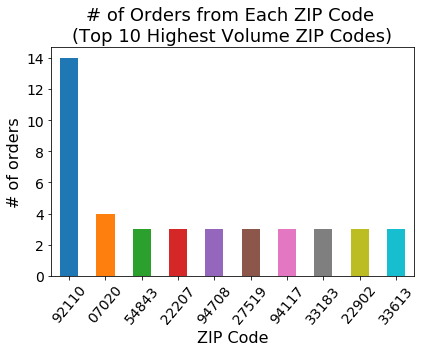

In [101]:
# Q: In which ZIP codes do most of our customers reside?
joint_grouped.head(10).plot(y='count', kind='bar', fontsize=14, legend=None, figsize=(6,5))
plt.xticks(rotation=50)
plt.title('# of Orders from Each ZIP Code \n(Top 10 Highest Volume ZIP Codes)', fontsize=18)
plt.xlabel('ZIP Code', fontsize=16)
plt.ylabel('# of orders', fontsize=16)

#plt.show()
plt.tight_layout()
plt.savefig('plot1.png', dpi=300)

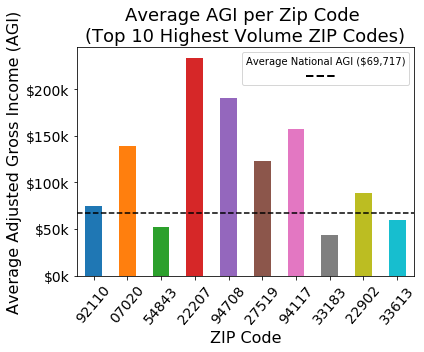

In [102]:
# Q: How wealthy are those ZIP Codes?
ax = joint_grouped.head(10).plot(y='avg_AGI', kind='bar', fontsize=14, figsize=(6,5))
plt.xticks(rotation=50)
plt.title('Average AGI per Zip Code \n(Top 10 Highest Volume ZIP Codes)', fontsize=18)
plt.xlabel('ZIP Code', fontsize=16)
plt.ylabel('Average Adjusted Gross Income (AGI)', fontsize=16)
line = Line2D([], [], linewidth=2, linestyle="--", color='black')
plt.axhline(y=67.565, color='black', linestyle='--')
plt.legend(title='Average National AGI ($69,717)', handles=[line], handlelength=3) #(Calc. from demo_data_sum)

fmt = '${x:,.0f}k'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

#plt.show()
plt.tight_layout()
plt.savefig('plot2.png', dpi=300)

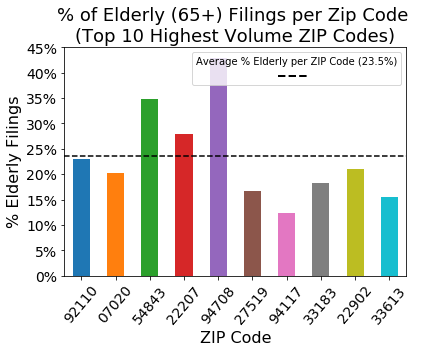

In [103]:
# Q: Can we get some idea of the age distribution of these ZIP codes?
ax = joint_grouped.head(10).plot(y='%_elderly', kind='bar', fontsize=14, figsize=(6,5))
plt.xticks(rotation=50)
plt.title('% of Elderly (65+) Filings per Zip Code \n(Top 10 Highest Volume ZIP Codes)', fontsize=18)
plt.xlabel('ZIP Code', fontsize=16)
plt.ylabel('% Elderly Filings', fontsize=16)

line = Line2D([], [], linewidth=2, linestyle="--", color='black')
plt.axhline(y=23.5, color='black', linestyle='--')
plt.legend(title='Average % Elderly per ZIP Code (23.5%)', handles=[line], handlelength=3) #(Calc. from demo_data_sum)

fmt = '{x:,.0f}%'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

#plt.show()
plt.tight_layout()
plt.savefig('plot3.png', dpi=300)

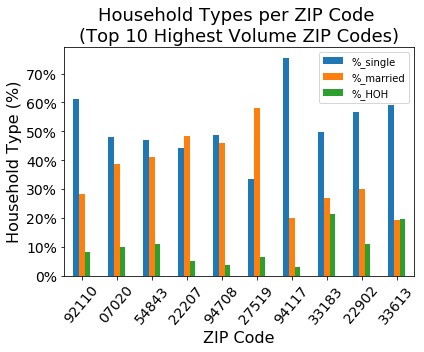

In [104]:
# Q: Single households vs. families?
ax = joint_grouped.head(10).plot(y=['%_single', '%_married', '%_HOH'], kind='bar', fontsize=14, figsize=(6,5))
plt.xticks(rotation=50)
plt.title('Household Types per ZIP Code \n(Top 10 Highest Volume ZIP Codes)', fontsize=18)
plt.xlabel('ZIP Code', fontsize=16)
plt.ylabel('Household Type (%)', fontsize=16)

fmt = '{x:,.0f}%'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

#plt.show()
plt.tight_layout()
plt.savefig('plot4.png', dpi=300)

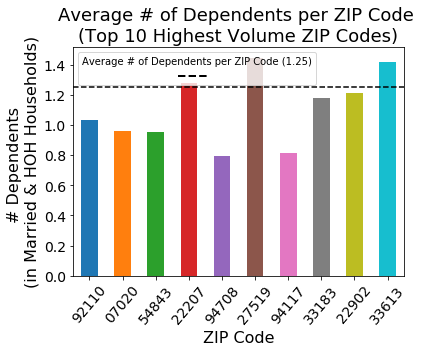

In [105]:
# Q: Average # of children in married & HOH households?
ax = joint_grouped.head(10).plot(y='avg_DEP', kind='bar', fontsize=14, figsize=(6,5))
plt.xticks(rotation=50)
plt.title('Average # of Dependents per ZIP Code \n(Top 10 Highest Volume ZIP Codes)', fontsize=18)
plt.xlabel('ZIP Code', fontsize=16)
plt.ylabel('# Dependents \n(in Married & HOH Households)', fontsize=16)

line = Line2D([], [], linewidth=2, linestyle="--", color='black')
plt.axhline(y=1.25, color='black', linestyle='--')
plt.legend(title='Average # of Dependents per ZIP Code (1.25)', handles=[line], handlelength=3) #(Calc. from demo_data_sum)

#plt.show()
plt.tight_layout()
plt.savefig('plot5.png', dpi=300)

### Explore purchase timing

In [106]:
amzn_data = amzn_data.set_index('purchase-date')

In [107]:
amzn_data.index = amzn_data.index.tz_localize('UTC').tz_convert('US/Eastern')
amzn_data = amzn_data.sort_index()
amzn_data = amzn_data.loc['2018'] #Only consider year 2018
print(amzn_data.head(5))
print(amzn_data.tail(5))

                               amazon-order-id zipcode
purchase-date                                         
2018-01-01 11:11:45-05:00  112-1835229-2605848   22207
2018-01-01 11:11:45-05:00  112-3147386-4255468   22207
2018-01-04 04:50:09-05:00  111-7765812-7480208   33020
2018-01-04 14:56:12-05:00  111-5993702-9229004   48854
2018-01-06 09:53:13-05:00  113-5758827-7801833   45231
                               amazon-order-id zipcode
purchase-date                                         
2018-12-26 16:54:38-05:00  114-8809939-2208254   60302
2018-12-26 17:35:35-05:00  114-9527398-7605029   10031
2018-12-26 22:29:13-05:00  113-2011911-5317005   90805
2018-12-27 10:52:30-05:00  114-3572626-5537048   33609
2018-12-28 16:09:12-05:00  112-3494590-9588255   98225


In [108]:
amzn_data_monthly = amzn_data.resample('M').count() \
    .drop('zipcode', axis=1) \
    .rename(columns={'amazon-order-id':'num_orders'})
amzn_data_monthly['month'] = amzn_data_monthly.index.month
amzn_data_monthly['month_str'] = amzn_data_monthly.index.strftime('%b')
amzn_data_monthly

,num_orders,month,month_str
purchase-date,,,
2018-01-31 00:00:00-05:00,35,1,Jan
2018-02-28 00:00:00-05:00,9,2,Feb
2018-03-31 00:00:00-04:00,7,3,Mar
2018-04-30 00:00:00-04:00,9,4,Apr
2018-05-31 00:00:00-04:00,7,5,May
2018-06-30 00:00:00-04:00,9,6,Jun
2018-07-31 00:00:00-04:00,39,7,Jul
2018-08-31 00:00:00-04:00,39,8,Aug
2018-09-30 00:00:00-04:00,45,9,Sep


In [109]:
amzn_data_daily = amzn_data.groupby(amzn_data.index.weekday_name).count() \
    .drop('zipcode', axis=1) \
    .rename(columns={'amazon-order-id':'num_orders'})
amzn_data_daily.index = pd.Categorical(amzn_data_daily.index, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday",
                                                              "Saturday", "Sunday"])
amzn_data_daily = amzn_data_daily.sort_index()
amzn_data_daily = amzn_data_daily.reset_index()
amzn_data_daily

,index,num_orders
0,Monday,38
1,Tuesday,22
2,Wednesday,32
3,Thursday,41
4,Friday,39
5,Saturday,65
6,Sunday,60


In [110]:
amzn_hourly = amzn_data.groupby(amzn_data.index.strftime('%H')).count() \
    .drop('zipcode', axis=1) \
    .rename(columns={'amazon-order-id':'num_orders'})

#Hour 03 is missing... add row for 03
amzn_hourly.loc['03'] = 0
amzn_hourly = amzn_hourly.sort_index()
amzn_hourly = amzn_hourly.reset_index()
amzn_hourly.head(6)

,index,num_orders
0,00,13
1,01,6
2,02,4
3,03,0
4,04,1
5,05,5


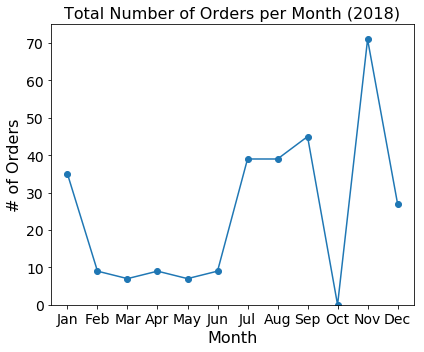

In [114]:
#Q: In what months do the majority of our customers make purchases?
ax = amzn_data_monthly.plot(x='month', y='num_orders', kind='line', fontsize=14, 
                            xticks=amzn_data_monthly['month'],
                           style='-o', legend=False, ylim=[0, 75], figsize=(6,5))
ax.set_xticklabels(amzn_data_monthly.index.strftime('%b'))
plt.title('Total Number of Orders per Month (2018)', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('# of Orders', fontsize=16)

#plt.show()
plt.tight_layout()
plt.savefig('plot6.png', dpi=300)

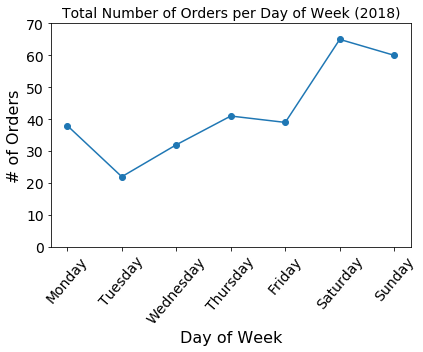

In [119]:
#Q: On what days do the majority of our customers make purchases?
#amzn_data_daily = amzn_data_daily.reset_index()
ax = amzn_data_daily.plot(x='index', y='num_orders', kind='line', fontsize=14, 
                                        xticks=amzn_data_daily.index,
                                       style='-o', legend=False, ylim=[0, 70], figsize=(6,5))
ax.set_xticklabels(amzn_data_daily['index'])
plt.xticks(rotation=50)
plt.title('Total Number of Orders per Day of Week (2018)', fontsize=14)
plt.xlabel('Day of Week', fontsize=16)
plt.ylabel('# of Orders', fontsize=16)

#plt.show()
plt.tight_layout()
plt.savefig('plot7.png', dpi=300)

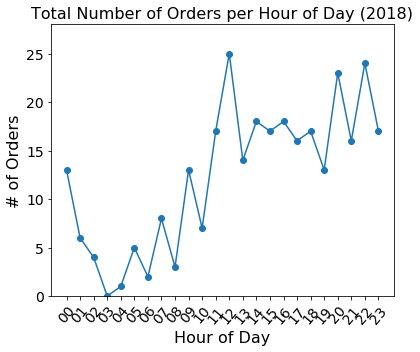

In [118]:
#Q: At what time of day do the majority of our customers make purchases?
#amzn_hourly = amzn_hourly.reset_index()
ax = amzn_hourly.plot(x='index', y='num_orders', kind='line', fontsize=14, 
                                        xticks=amzn_hourly.index,
                                       style='-o', legend=False, ylim=[0, 28], figsize=(6,5))
ax.set_xticklabels(amzn_hourly['index'])
plt.xticks(rotation=50)
plt.title('Total Number of Orders per Hour of Day (2018)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=16)
plt.ylabel('# of Orders', fontsize=16)

#plt.show()
plt.tight_layout()
plt.savefig('plot8.png', dpi=300)